- Administrative            
- Administrative_Duration   
- Informational             
- Informational_Duration    
- ProductRelated            
- ProductRelated_Duration   
- BounceRates               
- ExitRates                 
- PageValues                
- SpecialDay                
- Month                     
- OperatingSystems          
- Browser                   
- Region                    
- TrafficType               
- VisitorType               
- Weekend                   
- Revenue                   

In [ ]:
install.packages("tidyverse")

In [110]:
library(dplyr)
library(ggplot2)
library(tidyverse)

# Read data

In [113]:
path_data = '/home/creyesp/Projects/repos/r-course/data/online_shoppers_intention.csv'
#data = read.csv(path_data)
data = readr::read_delim(path_data, delim=',')

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



In [114]:
categorical = c(
    'Month',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend',
    'Revenue'
)

numerical = c(
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
)

# Overview
## General 

In [118]:
dim(data)

[1] 12330    18

In [115]:
glimpse(data)

Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

In [116]:
head(data[categorical])

Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [117]:
head(data[numerical])

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0


## Categorical 

In [25]:
lapply(data[categorical], unique)

$Month
 [1] Feb  Mar  May  Oct  June Jul  Aug  Nov  Sep  Dec 
Levels: Aug Dec Feb Jul June Mar May Nov Oct Sep

$OperatingSystems
[1] 1 2 4 3 7 6 8 5

$Browser
 [1]  1  2  3  4  5  6  7 10  8  9 12 13 11

$Region
[1] 1 9 2 3 4 5 6 7 8

$TrafficType
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20

$VisitorType
[1] Returning_Visitor New_Visitor       Other            
Levels: New_Visitor Other Returning_Visitor

$Weekend
[1] FALSE  TRUE

$Revenue
[1] FALSE  TRUE

## Missing values

In [43]:
# Return the column names containing missing observations
list_na <- colnames(data)[ apply(data, 2, anyNA) ]
list_na

[1] "Administrative"          "Administrative_Duration"
[3] "Informational"           "Informational_Duration" 
[5] "ProductRelated"          "ProductRelated_Duration"
[7] "BounceRates"             "ExitRates"

In [80]:
data.frame(missing = sapply(data[numerical], function(x){sum(is.na(x))}))

,missing
,<int>
Administrative,14
Administrative_Duration,14
Informational,14
Informational_Duration,14
ProductRelated,14
ProductRelated_Duration,14
BounceRates,14
ExitRates,14
PageValues,0


# Visualization 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”


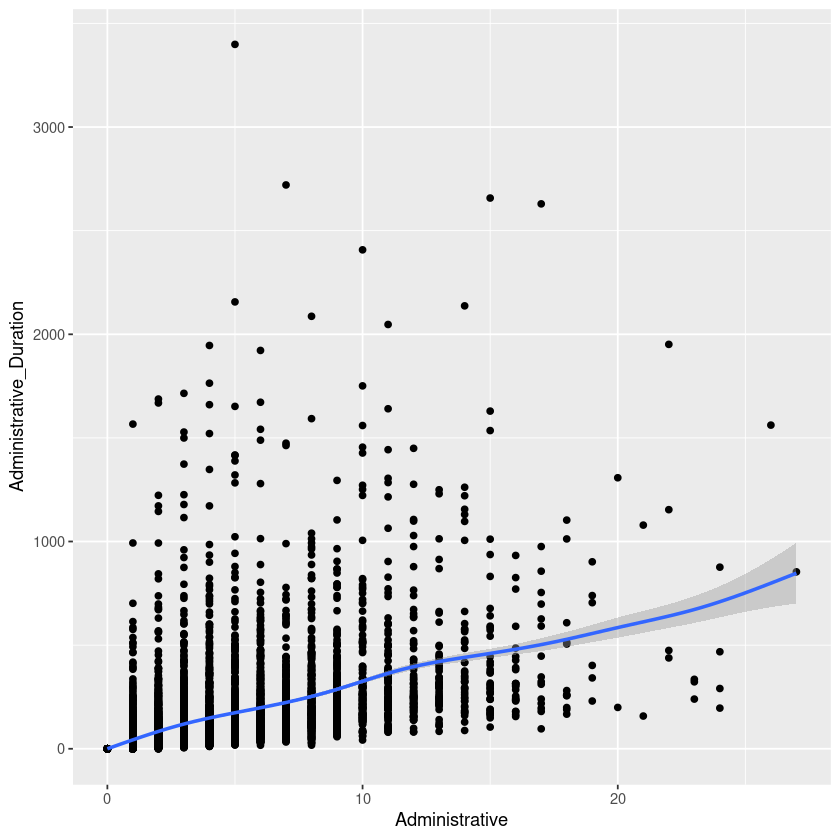

In [29]:
ggplot(data, aes(x=Administrative, y=Administrative_Duration)) + 
  geom_point() + 
  geom_smooth()

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


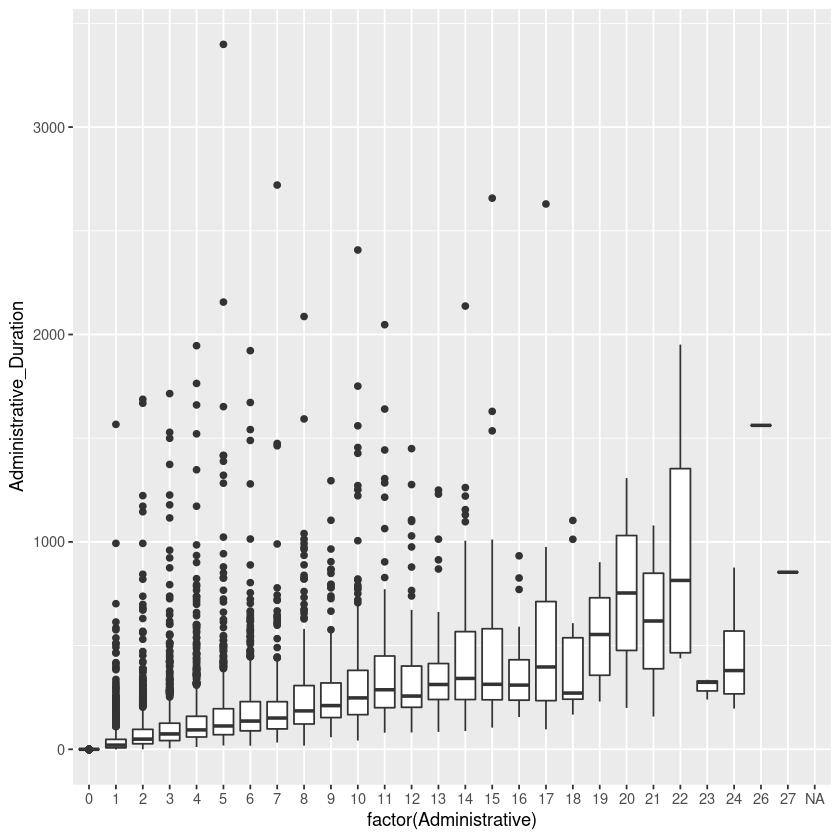

In [8]:
ggplot(data, aes(x=factor(Administrative), y=Administrative_Duration)) + 
  geom_boxplot()

In [94]:
rep(7:10, 3)%/%3

[1] 2 2 3 3 2 2 3 3 2 2 3 3

In [95]:
rep(7:10, 3)/3

[1] 2.333333 2.666667 3.000000 3.333333 2.333333 2.666667 3.000000 3.333333
 [9] 2.333333 2.666667 3.000000 3.333333

In [101]:
ceiling(rep(7:10, 3)/3)

[1] 3 3 3 4 3 3 3 4 3 3 3 4

In [102]:
floor(rep(7:10, 3)/3)

[1] 2 2 3 3 2 2 3 3 2 2 3 3

In [98]:
rep(7:10, 3)%%3

[1] 1 2 0 1 1 2 0 1 1 2 0 1

In [104]:
max(rep(7:10, 3))

[1] 10

In [105]:
.libPaths()

[1] "/home/creyesp/R/x86_64-pc-linux-gnu-library/3.6"
[2] "/usr/local/lib/R/site-library"                  
[3] "/usr/lib/R/site-library"                        
[4] "/usr/lib/R/library"

In [106]:
search()

[1] ".GlobalEnv"        "package:ggplot2"   "package:dplyr"    
 [4] "package:jsonlite"  "jupyter:irkernel"  "package:stats"    
 [7] "package:graphics"  "package:grDevices" "package:utils"    
[10] "package:datasets"  "package:methods"   "Autoloads"        
[13] "package:base"

In [120]:
length(data)

[1] 18

In [121]:
dim(data)

[1] 12330    18

In [122]:
nrow(data)

[1] 12330

In [126]:
data[1:3,1:3]

Administrative,Administrative_Duration,Informational
<dbl>,<dbl>,<dbl>
0,0,0
0,0,0
0,-1,0


In [129]:
data$Administrative

[1]  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   [25]  0  0  4  0  0  1  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0
   [49]  0  0  0  0  0  0  0  0  0  4  0  2  0  0 12  0  0  3  4  0  0  0  0  0
   [73]  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
   [97]  0  0  0  0  3  4  0  2  3  0  0  0  0  6  0  0  0  2  0  0  0  0  0  0
  [121]  0  0  0  0  0  0  0  0  4  0  0  2  0  0  6  0  0  0  0  4  0  0  3  0
  [145]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0  0
  [169]  0  0  1  0  0  0  5  3  0  1  0  0  0  0  0  0  0  0  2 10  9  3  0  3
  [193]  3  0  0  0  2  3  0  3  1  0  5  0  1  3  1  2  3  0  2  0  0  4  2  2
  [217]  2  0  0  0  2  0  0  1  1  0  5  0  0  0  2  6  0  1  2  3  3  6  0  0
  [241]  8  2  1  0  0  0  0  1 16  1  2  0  0  0  0  4  1  5  0  0  3  0  1  0
  [265]  0  0  0  0  0  0  1  0  1  4  0  0  4  0  0  0  0  0 13  0  2  0  0  0
  [289] 11  0  1  2  0  0  2  0  0  4  0  0  5  0  0  0  0  0  0  0  0  5  0  0
  [313]  2  0  7  3  0  2  2  1  1  0  0  2  6  4  2  0  3  2  0  3  1  4  0  1
  [337]  1  0  0  1  0  0  0  0  0  4  0  6  3  1  2  0  8  9  3  0  0  0  3  0
  [361]  0  0  1  4  0  3  0  1  5  2  8  0  2  1  0  0  4  3  0  2  0  0  1  0
  [385]  9  0  0  0  0  0  6  0  1  3  0  7  3  1  0  7  2  0  5  3  4  0  4  0
  [409]  8  3  0  2  4  3  1  0  0  0  0  0  1  0  0  2  4  0  0  0  0  0  2  0
  [433]  2  2  0  2  0  0  1  3  0  2  0  5  0  3  3  3  6  1  0  0  0  0  1  0
  [457]  0  0  0  0  7  0  0  0  0  5  7  3  0  3  0  0  0  0  0  1  3 10 13  0
  [481]  1  0  2  0  2  0  0  0  0  2  0  0  0  0  2  0  8  0  5  4  0  0 18  4
  [505]  1  6  2  0  1  0 14  6  0  6  0  0  0  9  0  3  0  3  0  1  4  4  2  0
  [529]  0  1  2  1  0  0  0  2  0  0  0  0  0  0  0  2  6  2  0  6  3  0  2  0
  [553] 12  0  0  0  4  4  0  0  7  3  0  0  0  1  0  1  0  0  0  0  0  0  5 12
  [577]  0  0  3  6  0  0  1  0  4  0  4  0  0  0  0  0  0  5  1  9  0  0  0  1
  [601]  6  6  3  3  0  0  3  1  0  1  6 16  6  4  3  0  8  1  8 13  4  3  0  0
  [625]  1  2  0  1  0  0  3  0  4  0  0  8  0  0  0  2  3 17  3  0  8  0  2  0
  [649]  3  2  0  0  2  0  5  6  0  2  0  0  0  2  4  0  0  5  0  2  3  2  0  0
  [673]  3  0  5  2  2  1  1  0  0  6  2  3  0  0  0  0  0  0  0  0  8  2  1  5
  [697]  7  3  8  0  0  5  6  0 19  0  4  7  5  0  1  0  0  0  0  0  2  3  0  1
  [721]  0  0  4  0  0  0  1  0  0  0  2  0  0  2  3  0  0  1  2  2  5  0  1  0
  [745]  0  0  3  3  1  0  0  3  6  7  1  5  2  0  0  0  6  2  0  0  0  0  0  0
  [769]  2 15  2  0  6  7  0  2  0 11  0  3  0  0  4  4  0  0  0  2  9  0  0  0
  [793]  4  3  2  1  9  0  0 10  0  2  3  0  0  0  1  0  2  3  7  0  0  0  0  6
  [817]  3  2  0  0  1  0  0  0  0  0  2  0  5  1  4  0  0  5  3  7  2  5  3  0
  [841]  3  0  5  0  8  4  4  0  9  4  0  7  0  8  7  5  0  4  0  2  0  0  1  6
  [865]  0  0  5  0  0  3  0  5  0  8  3  0  1  9  0  0  0  1  9  1  9  3  2  3
  [889]  0  0  0  1  0  0  5  0  1  0  3  0  0  0  0  0  3  3 11  0  0  4  4  0
  [913]  4  0  0  1 12  0 10  4  0  4  0  2  6  6  0  0  0  0  0  4 13  0  3  0
  [937]  0  0  0  4  4  5  0  0 11  0  3  0  3  5  0  0  8  0  0  5  0  0  3  0
  [961]  0  2  3  2  0  1 14  0  0  0  5  4  4  0  0  4  0  0  0 11  0  2  0  1
  [985]  1  0  5  1  0  2  1  5  0  0  0  1 10  0  0  0  0  4  2  4  0  0  0  0
 [1009]  0  4  0  2  0  0  0  2  2  2  0  3  0  2  0  0  0  3  7  0  0  1  4  0
 [1033]  3  0  0  0  2  1  0  0  1  9  1  3  0  0  0  0  0  5  1  6  0  0  4  0
 [1057]  0  0  6  0  0  0  0  3  4 NA  0  2  3  6  0  0  1  4  0  0  4  0  0  0
 [1081]  0  0  0  0  5  0  0  0  0  1  0  2  0  0  0  3  7  1  0  0  0  2 10  0
 [1105]  0 15  6  0  3  0  0  3  0  1  0  0  0  3  0  0  0  0  3  0  0  1  0  2
 [1129]  0  1  0  9 NA NA NA NA NA  1  2  5  0  3  0  0  1  4  3  5  0  0  0  1
 [1153]  6  0  0  0  0 10  0  1  1  1  0  0  1  1  2  1  0  0  0  0  0  1  0  0
 [1177]  0  2  0  1  0  1  9  2  6  6  0  0  4  0  4  0  3  2  3  2  0  0  0  0
 [12

In [141]:
data[1:3, 'Administrative']

Administrative
<dbl>
0
0
0


In [159]:
typeof(data[,1])

[1] "list"

In [158]:
typeof(data[[1]])

[1] "double"